## Preparation
---

In [1]:
# https://www.youtube.com/watch?v=QIUxPv5PJOY

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 

import yfinance as yf
import datetime


2023-09-15 00:24:32.241561: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[*********************100%%**********************]  1 of 1 completed


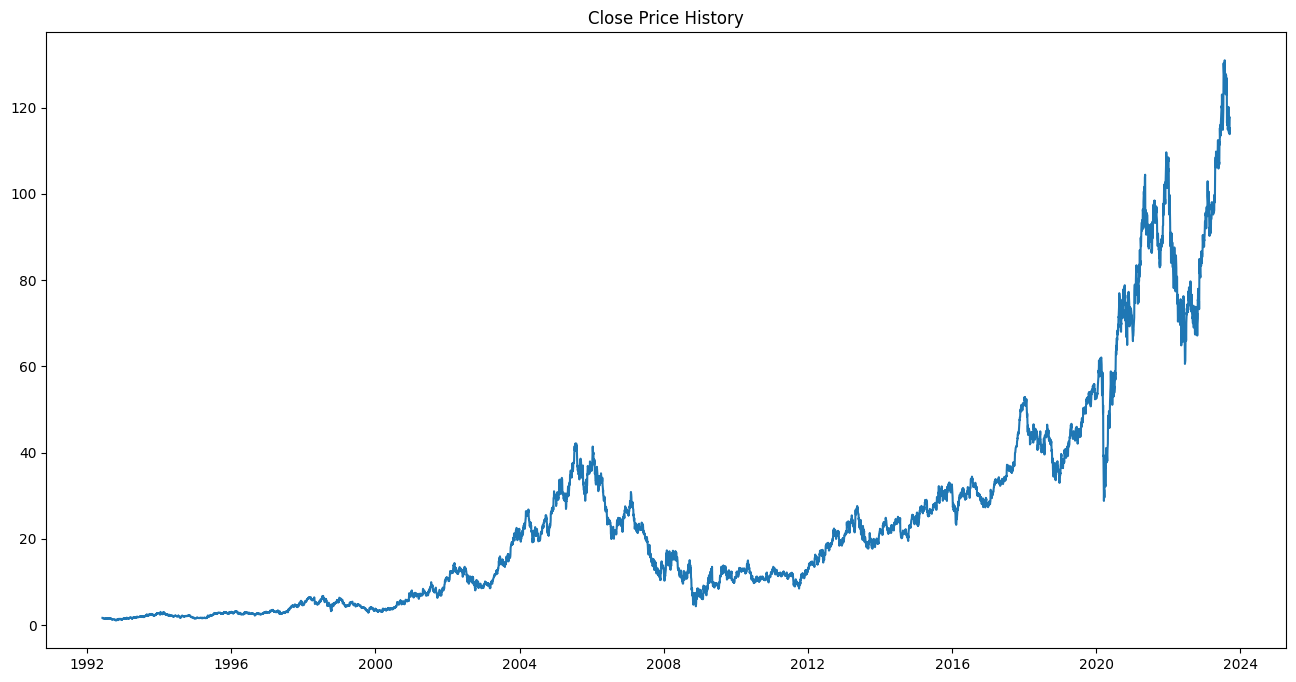

In [2]:
stock = "DHI"
df = yf.download(stock)
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

In [3]:
# Get the stock quote

start_date = datetime.datetime(2009, 1, 1)
end_date = datetime.datetime(2019, 12, 17)

df = yf.download(stock, start=start_date)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,7.100000,7.440000,6.850000,7.340000,6.213735,4164400
2009-01-05,7.400000,8.090000,7.150000,8.000000,6.772462,7633500
2009-01-06,8.280000,8.390000,7.860000,8.000000,6.772462,8488700
2009-01-07,7.840000,7.960000,7.440000,7.570000,6.408445,5802300
2009-01-08,7.280000,8.200000,7.280000,8.150000,6.899445,6393900
...,...,...,...,...,...,...
2023-09-08,117.169998,118.449997,116.430000,117.309998,117.309998,1575300
2023-09-11,117.510002,119.750000,117.110001,117.879997,117.879997,1417300
2023-09-12,117.370003,118.430000,114.419998,114.639999,114.639999,2673900



---

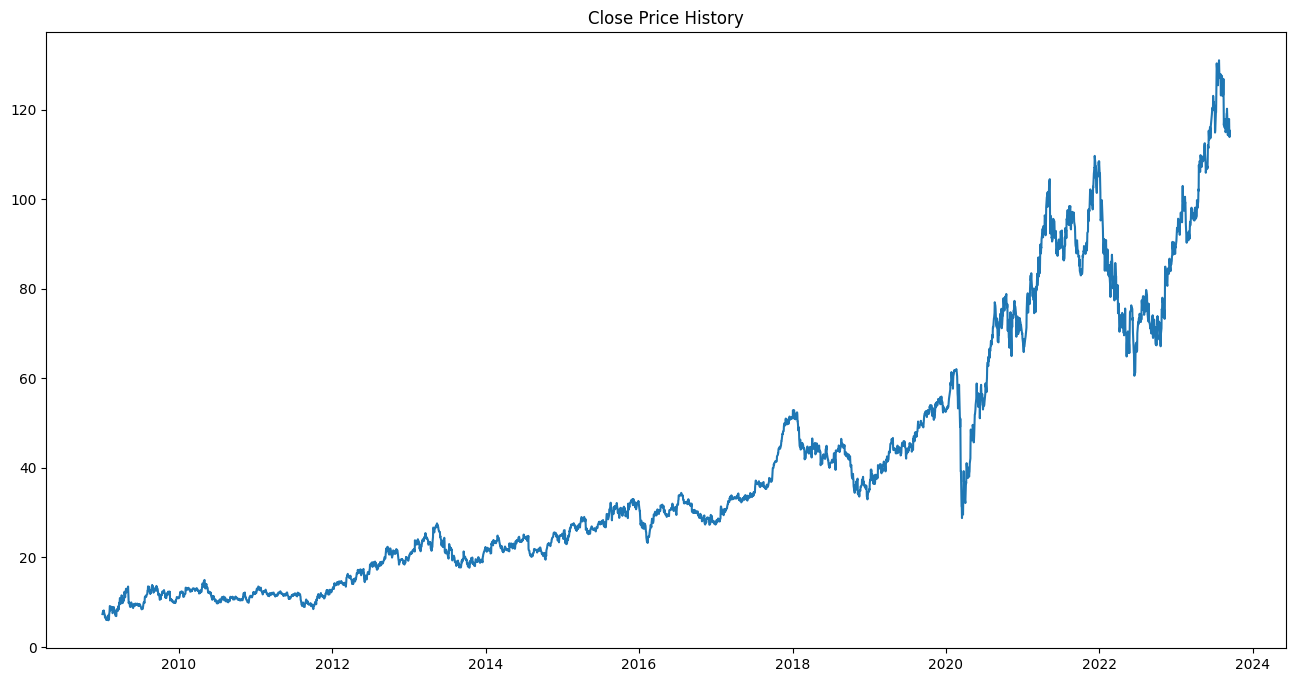

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.show()

## Data Processing
---

In [5]:
## Interval內 8成為records

data = df[['Close']]

dataset = data.values  # Take out the index col
training_data_len = math.ceil(len(dataset)*0.8)   ## Can be repalced by sklearn 
training_data_len

2960

In [6]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1)) # 用泥scale 野既模組

scaled_data = scaler.fit_transform(dataset)



In [7]:
interval = 40

In [8]:
# Spilt the data

train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []
delay = 8

for i in range(interval+delay, len(train_data)):
    x_train.append(train_data[i-interval-delay:i-delay,0])
    y_train.append(train_data[i,0])   


    if i == 60:
        print(x_train)
        


[array([0.01103647, 0.01631478, 0.01631478, 0.01287588, 0.01751439,
       0.01535509, 0.01015675, 0.00991682, 0.00487844, 0.00511836,
       0.0065579 , 0.00087972, 0.00287908, 0.00079974, 0.00335893,
       0.00415867, 0.00351887, 0.00839731, 0.00159949, 0.        ,
       0.00119962, 0.01167626, 0.01247601, 0.0168746 , 0.02543186,
       0.02455214, 0.01767434, 0.02023352, 0.02007358, 0.02399232,
       0.02367243, 0.01983365, 0.01263596, 0.01327575, 0.01639476,
       0.02351247, 0.02359245, 0.02007358, 0.01991363, 0.01671465]), array([0.01631478, 0.01631478, 0.01287588, 0.01751439, 0.01535509,
       0.01015675, 0.00991682, 0.00487844, 0.00511836, 0.0065579 ,
       0.00087972, 0.00287908, 0.00079974, 0.00335893, 0.00415867,
       0.00351887, 0.00839731, 0.00159949, 0.        , 0.00119962,
       0.01167626, 0.01247601, 0.0168746 , 0.02543186, 0.02455214,
       0.01767434, 0.02023352, 0.02007358, 0.02399232, 0.02367243,
       0.01983365, 0.01263596, 0.01327575, 0.01639476, 0.02

In [9]:
## Convert the x_train and y_train 
x_train, y_train = np.array(x_train), np.array(y_train)



In [10]:
## Reshape the data for LSTM model

i,j = x_train.shape
x_train_reshaped = np.reshape(x_train,(i,j,1))
print(x_train_reshaped.shape)


(2912, 40, 1)


## Modeling
---

In [11]:
# Build the LSTM Model

model = Sequential()

num_cells = 40
# model.add(LSTM(50, return_sequences=True, input_shape= (j,1)))
model.add(LSTM(num_cells , return_sequences=False, input_shape=(j,1)))

model.add(Dense(25))
model.add(Dense(1))

In [12]:
## Comple the model
model.compile(optimizer='adam', loss = 'mean_squared_error')


In [13]:
num_epochs = 3
model.fit(x_train, y_train, batch_size = 1, epochs=num_epochs)

Epoch 1/3
2912/2912 [==============================] - 30s 9ms/step - loss: 6.5475e-04
Epoch 2/3
2912/2912 [==============================] - 27s 9ms/step - loss: 4.6170e-04
Epoch 3/3
2912/2912 [==============================] - 23s 8ms/step - loss: 4.4911e-04


In [14]:
test_data = scaled_data[training_data_len-interval:]

x_test = []
y_test = dataset[training_data_len:,]

for i in range (interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])


In [15]:
x_test = np.array(x_test)

In [23]:
x_test

array([[[0.50975685],
        [0.50447857],
        [0.5222329 ],
        ...,
        [0.57245682],
        [0.57525591],
        [0.5577415 ]],

       [[0.50447857],
        [0.5222329 ],
        [0.52399235],
        ...,
        [0.57525591],
        [0.5577415 ],
        [0.55302304]],

       [[0.5222329 ],
        [0.52399235],
        [0.52327255],
        ...,
        [0.5577415 ],
        [0.55302304],
        [0.55822139]],

       ...,

       [[0.97640757],
        [0.97504796],
        [0.97480805],
        ...,
        [0.88891555],
        [0.89051502],
        [0.89507355]],

       [[0.97504796],
        [0.97480805],
        [0.95537427],
        ...,
        [0.89051502],
        [0.89507355],
        [0.86916186]],

       [[0.97480805],
        [0.95537427],
        [0.97264877],
        ...,
        [0.89507355],
        [0.86916186],
        [0.86292387]]])

In [16]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [17]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

24/24 [==============================] - 1s 4ms/step


## RMSE
---

In [18]:
rmse = np.sqrt(np.mean((y_test - predictions)**2))
rmse

2.721663784331829

## Plot the Data
---

/var/folders/0c/4yyxy27966j8h86h_vwsy3680000gn/T/ipykernel_1163/643579412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


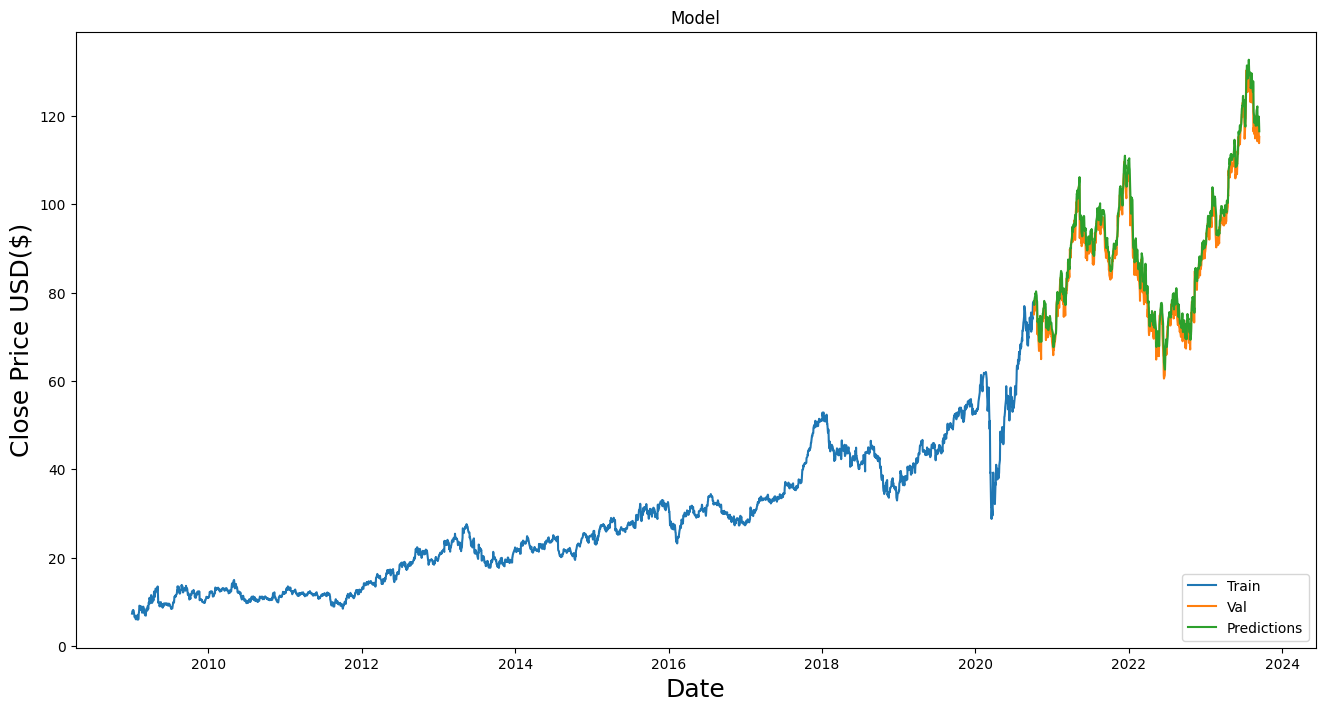

In [19]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(valid['Predictions'])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()




## Result in Data

---

In [20]:

valid

,Close,Predictions
Date,,
2020-10-06,75.110001,78.133392
2020-10-07,75.760002,77.222977
2020-10-08,77.709999,77.279457
2020-10-09,78.089996,78.604202
2020-10-12,78.349998,79.400116
...,...,...
2023-09-08,117.309998,118.742462
2023-09-11,117.879997,119.266449
2023-09-12,114.639999,119.865105


In [21]:
valid.to_csv('{0}days_{1}Cells_{2}Epoches_{3}daysdelay.csv'.format(interval,num_cells, num_epochs, delay), index=True)


In [22]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets
